In [37]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setinin yüklenmesi
df = pd.read_csv("/content/winequality-red.csv")

# İlk 5 gözlemin görüntülenmesi
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Burada veri setinin yuklenmesi

In [38]:
# Veri seti hakkında genel bilgiler
df.info()

# Eksik (null) değer kontrolü
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Wine Quality veri setinde eksik veri bulunmamaktadır.

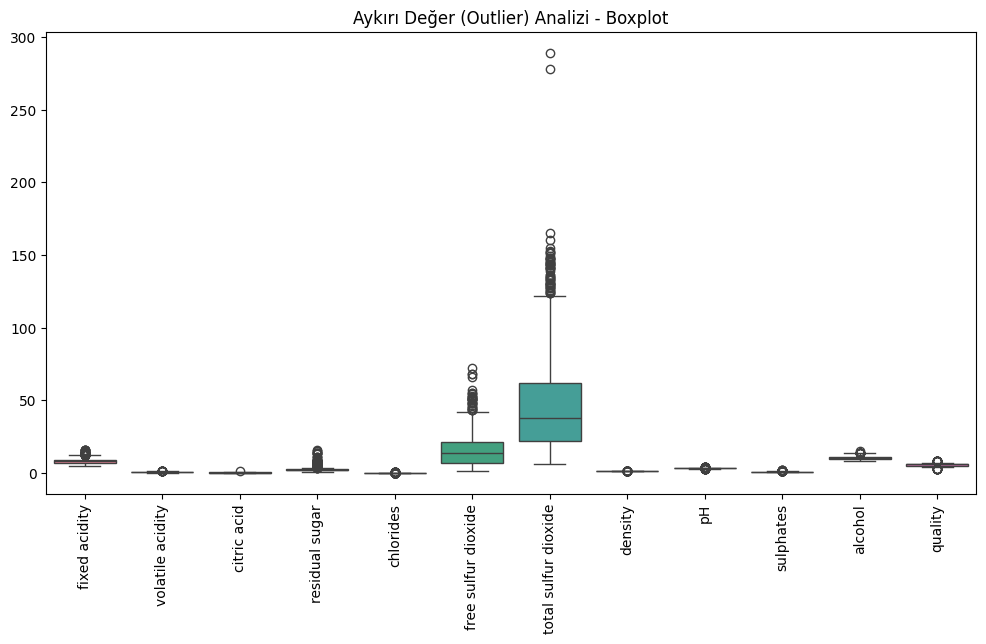

In [39]:
# Aykırı değerleri gözlemlemek için boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Aykırı Değer (Outlier) Analizi - Boxplot")
plt.show()


Bazı değişkenlerde uç değerler gözlemlenmektedir. Ancak veri setinin doğası gereği bu değerler korunmuştur.

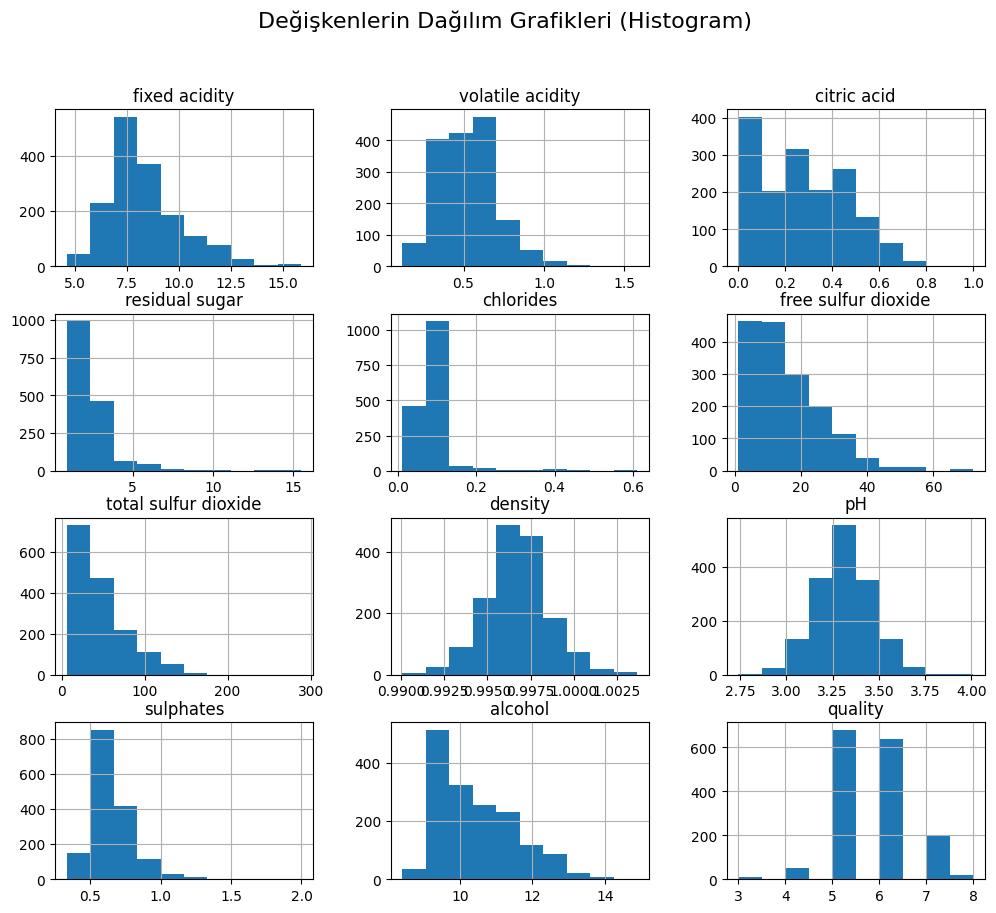

In [40]:
# Tüm sayısal değişkenlerin dağılım grafikleri
df.hist(figsize=(12,10))
plt.suptitle("Değişkenlerin Dağılım Grafikleri (Histogram)", fontsize=16)
plt.show()


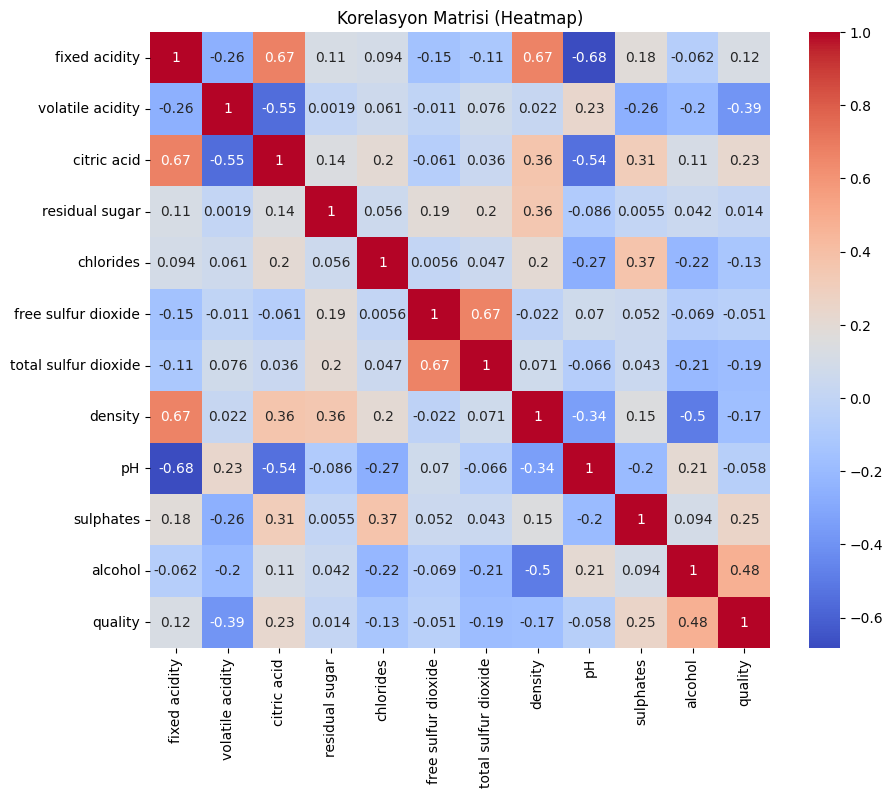

In [41]:
# Değişkenler arası korelasyon matrisi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi (Heatmap)")
plt.show()


Alkol oranı ile kalite arasında pozitif bir ilişki olduğu görülmektedir.

In [42]:
# Lineer regresyon için gerekli kütüphaneler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Bağımsız değişken (X) ve bağımlı değişken (y)
X = df[['alcohol']]
y = df['density']

# Eğitim ve test verisinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelin oluşturulması ve eğitilmesi
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Tahmin
y_pred = lr_model.predict(X_test)

# R² skorunun hesaplanması
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)



R² Skoru: 0.2945600873455403


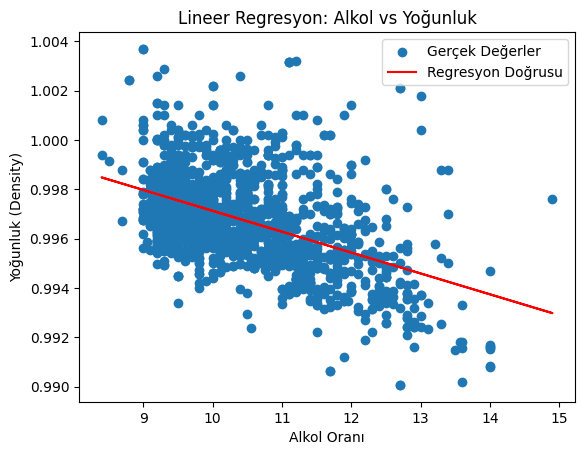

In [43]:
plt.scatter(X, y, label="Gerçek Değerler")
plt.plot(X, lr_model.predict(X), color="red", label="Regresyon Doğrusu")
plt.xlabel("Alkol Oranı")
plt.ylabel("Yoğunluk (Density)")
plt.title("Lineer Regresyon: Alkol vs Yoğunluk")
plt.legend()
plt.show()


R² skoru, alkol oranının yoğunluğu açıklama gücünü göstermektedir.

Hedef Değişkenin Oluşturulması

In [45]:
# Quality değişkeninin binary hale getirilmesi
# 6 ve üzeri: iyi (1), 6 altı: kötü (0)
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)


Eğitim ve Test Verisinin Hazırlanması

In [46]:
# Bağımsız değişkenler
X = df.drop(['quality', 'quality_label'], axis=1)

# Hedef değişken
y = df['quality_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Sonuçları")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Sonuçları
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320

Confusion Matrix:
[[107  34]
 [ 49 130]]


KNN. En iyi k değerinin bulunması

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy_list = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

best_k = accuracy_list.index(max(accuracy_list)) + 1
print("En iyi k değeri:", best_k)


En iyi k değeri: 19


SVM

In [49]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("SVM Sonuçları")
print(classification_report(y_test, y_pred))


SVM Sonuçları
              precision    recall  f1-score   support

           0       0.68      0.34      0.45       141
           1       0.63      0.87      0.73       179

    accuracy                           0.64       320
   macro avg       0.65      0.61      0.59       320
weighted avg       0.65      0.64      0.61       320



Decision Tree



In [50]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree Sonuçları")
print(classification_report(y_test, y_pred))


Decision Tree Sonuçları
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       141
           1       0.77      0.74      0.76       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320

